# ch6. z-test와 단측 검정
## 통계적 가설 검정 과정

1. 유의수준 결정, 귀무 가설과 대립 가설 설정
2. 검정 통계량 계산
3. p-value 계산
4. 통계적 의사 결정

## z-test

z-test는 모집단이 정규분포를 따르고, 모분산을 알 때 사용할 수 있는 기법입니다. 이름이 Z인 이유는 표준 정규 분포가 z 분포라고도 불리기 때문이고, 이는 다시 독일어로 "중간"을 의미하는 "Zwischen" 라는 단어에서 유래하였습니다. 

Z-test는 가장 기본적인 가설 검정 기법으로 개념을 익히기에 좋습니다. 실제로는 모분산을 알지 못하는 경우가 많기 때문에 이런 한계를 보완한 t-test를 사용합니다. z-test를 직접 해보면서 통계적 가설 검정 개념을 배워보겠습니다.

*Q: 한 쪽은 한국 청소년들의 TV 시청 시간이 평균 3시간이라고 주장합니다. 다른 측은 3시간보다 작을 것이라 주장합니다. 어느 편이 맞는지 알아보기 위해 임의로 추출한 100명을 조사한 결과 평균 2.75 시간이었습니다. TV 시청 시간은 정규 분포를 따르며 분산은 과거 조사에서 1로 알려져 있습니다.*

### 1. 귀무가설, 대립 가설, 유의수준 설정

먼저 귀무가설과 대립 가설을 세웁니다.  

- 귀무가설: 모집단의 평균 TV 시청 시간은 3시간이다.
- 대립가설: 모집단의 평균 TV 시청 시간은 3시간 보다 작을 것이다.

이를 기호를 이용해 표현하면 아래와 같습니다.  

$$H_{0}:\;\mu=3$$
$$H_{a}:\;\mu<3$$

유의 수준은 특별한 조건이 없다면 사회 현상의 경우엔 0.05를 사용합니다.

### 2. 검정 통계량 계산

검정 통계량(test statistic)이란 통계적 가설의 진위 여부를 검정하기 위해 표본으로부터 계산하는 통계량을 말합니다. 보통 각 테스팅 기법마다 구해야하는 값들이 정해져 있으며, 이를 이용하여 p-value를 계산합니다.

앞서 문제에서는 모분산이 1인 모집단에서 추출한 표본의 평균이 2.75 시간이었습니다. "한국 청소년들의 평균 TV 시청 시간은 3시간이다" 라는 귀무 가설을 기각하려면 표본을 추출했을 때 2.75가 우연히 나왔을 확률을 계산하면 됩니다. 만일, 우연히 나왔을 확률이 허용 가능한 1종 오류의 수준인 0.05보다 작다면 귀무 가설을 기각할 수 있습니다.

그러면 표본 평균이 2.75 보다 같거나 작은 값을 가질 확률을 계산해야겠죠? 그리고 표본 평균은 평균이 3, 표준편차가 1/10인 정규분포를 따릅니다. 2.75보다 작은 값을 가질 확률을 그림으로 나타내면 아래와 같습니다.

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm

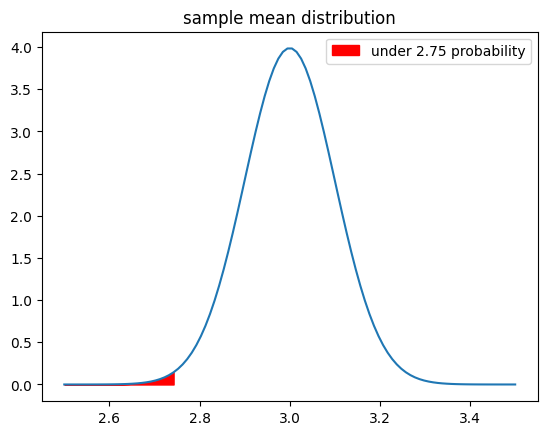

In [3]:
x = np.linspace(2.5, 3.5, 100)  
pdf = norm.pdf(x, loc=3, scale=0.1)
plt.plot(x, pdf)
plt.fill_between(x, pdf, where=(x <= 2.75), label='under 2.75 probability', color="red")
plt.title("sample mean distribution")
plt.legend()

정규 분포에서 특정 영역의 확률 값을 구하기 위해서는 분포를 표준 정규 분포로 맞추고, 표준 정규 분포표를 이용하여 확률 값을 계산하였습니다. 따라서 z-test에서 가설을 검정하기 위한 검정 통계량은 표본 평균에서 모평균을 빼주고, 표본 표준 편차로 나눠준 값이 됩니다. 즉, 표준 정규분포표를 이용하여 확률을 계산할 때 필요한 값이 z-test의 검정 통계량인 z-statistic이 됩니다.


$$검정\;통계량 Z=\frac{\bar{X}-\mu}{\sigma/\sqrt{n}}=\frac{2.75-3}{1/\sqrt{100}}=-2.5$$

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


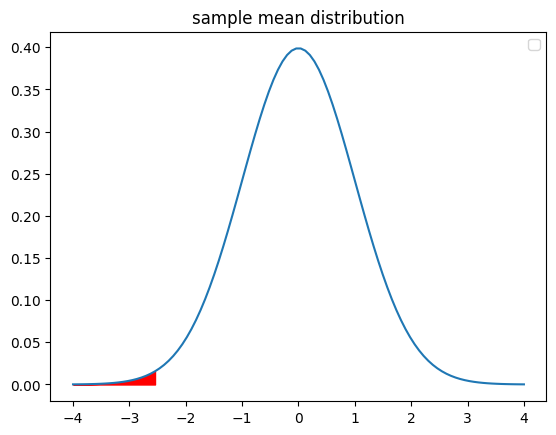

In [4]:
x = np.linspace(-4, 4, 100)  
pdf = norm.pdf(x, loc=0, scale=1)
plt.plot(x, pdf)
plt.fill_between(x, pdf, where=(x <= -2.5), color="red")
plt.title("sample mean distribution")
plt.legend()

### 3. p-value 계산

표준 정규분포표를 이용하여 -2.5 보다 작을 확률을 계산해보면 0.00621이 나오며, 이 값이 p-value입니다. 해석해보자면 모집단에서 표본을 추출하여 얻은 표본 평균이 우연히 2.75보다 같거나 작은 값을 가질 확률은 0.00621이 됩니다.

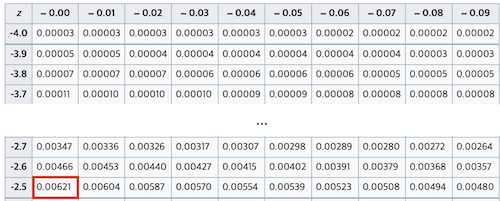

### 4. 통계적 의사결정

검정 통계량을 이용해서 계산한 p-value가 유의 수준인 0.05보다 작았습니다. 즉, 우연히 표본 평균이 2.75보다 같거나 작은 값이 나올 확률이 0.00621이라는 말로 우연이 아니라 통계적으로 유의한 차이를 보인다고 할 수 있습니다. 그러므로 귀무 가설을 기각할 수 있으며, 청소년들의 평균 TV 시청 시간은 3시간보다 작다고 결정할 수 있습니다.

## 연습문제

*Q1. A 제과 회사에서 K 젤리라는 상품을 팔고 있습니다. K 젤리의 무게의 평균은 70g, 표준 편차는 5g입니다. A 회사의 경쟁사인 B사는 A사가 무게를 부풀렸다고 생각합니다. 이를 통계적으로 입증하기 위해 K 젤리를 100개 구매한 결과 표본 평균은 68.5g이었습니다. "K 젤리의 무게의 평균은 70g 보다 작다" 라는 대립가설을 세우고, z-test를 이용하여 A사가 무게를 부풀렸는지 입증하세요.*